## Prediction using trained model

In [68]:
import os
from cellpose import models
from skimage import io as skio
import numpy as np
from tqdm import tqdm  # progress bar (optional)
import re

from pathlib import Path

image_ext = ".png"

flow_threshold = 0.9
cellprob_threshold = -6
min_size = 1

In [69]:
image_dir = Path('/mnt/WorkingDos/3_split_jayden_test_images')
image_files = [f for f in image_dir.glob("*"+image_ext) if "_masks" not in f.name and "_flows" not in f.name]
# image_files = [f for f in os.listdir(image_dir) if f.lower().endswith('.tif')]

model_path = '/mnt/WorkingDos/cellpose_sam/models/cp_sam_hdrg_topoint_model'
# '/mnt/WorkingDos/cellpose_sam/models/cp_sam_hdrg_model'
model = models.CellposeModel(gpu=True, pretrained_model=model_path)

output_dir = "/mnt/WorkingDos/cellpose_sam/outs"
os.makedirs(output_dir, exist_ok=True)

for image_file in tqdm(image_files, desc="Segmenting images"):
    image_path = os.path.join(image_dir, image_file)

    img = skio.imread(image_path)

    masks, flows, styles = model.eval(
        [img], 
        batch_size = 16,
        # diameter=None,  # default val 30
        flow_threshold=flow_threshold,
        cellprob_threshold=cellprob_threshold,
        augment=True,
        resample=True,
        min_size=min_size
    )
    
    mask = masks[0]
    
    # Save the mask using the same base filename
    base_name = os.path.splitext(image_file)[0]
    mask_path = os.path.join(output_dir, f"{base_name}.npy")
    np.save(mask_path, mask)

Segmenting images:   0%|          | 0/64 [00:00<?, ?it/s]resample deprecated in v4.0.1+
resample deprecated in v4.0.1+
Segmenting images:   2%|▏         | 1/64 [00:01<01:38,  1.57s/it]resample deprecated in v4.0.1+
resample deprecated in v4.0.1+
Segmenting images:   3%|▎         | 2/64 [00:03<01:40,  1.62s/it]resample deprecated in v4.0.1+
resample deprecated in v4.0.1+
no seeds found in get_masks_torch - no masks found.
Segmenting images:   5%|▍         | 3/64 [00:04<01:37,  1.60s/it]resample deprecated in v4.0.1+
resample deprecated in v4.0.1+
Segmenting images:   6%|▋         | 4/64 [00:06<01:35,  1.58s/it]resample deprecated in v4.0.1+
resample deprecated in v4.0.1+
Segmenting images:   8%|▊         | 5/64 [00:07<01:32,  1.57s/it]resample deprecated in v4.0.1+
resample deprecated in v4.0.1+
Segmenting images:   9%|▉         | 6/64 [00:09<01:31,  1.57s/it]resample deprecated in v4.0.1+
resample deprecated in v4.0.1+
Segmenting images:  11%|█         | 7/64 [00:10<01:25,  1.51s/it]re

resample deprecated in v4.0.1+
Segmenting images:  30%|██████▊                | 66/221 [08:26<18:34,  7.19s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
resample deprecated in v4.0.1+
Segmenting images:  30%|██████▉                | 67/221 [08:34<18:57,  7.39s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
resample deprecated in v4.0.1+
Segmenting images:  31%|███████                | 68/221 [08:43<19:44,  7.74s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
resample deprecated in v4.0.1+
Segmenting images:  31%|███████▏               | 69/221 [08:51<19:51,  7.84s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be u

resample deprecated in v4.0.1+
Segmenting images:  45%|██████████▎            | 99/221 [12:46<14:47,  7.27s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
resample deprecated in v4.0.1+
Segmenting images:  45%|█████████▉            | 100/221 [12:54<15:01,  7.45s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
resample deprecated in v4.0.1+
Segmenting images:  46%|██████████            | 101/221 [13:02<15:08,  7.57s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
resample deprecated in v4.0.1+
Segmenting images:  46%|██████████▏           | 102/221 [13:10<15:12,  7.67s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be u

resample deprecated in v4.0.1+
Segmenting images:  60%|█████████████▏        | 132/221 [16:59<11:54,  8.03s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
resample deprecated in v4.0.1+
Segmenting images:  60%|█████████████▏        | 133/221 [17:07<11:48,  8.06s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
resample deprecated in v4.0.1+
no seeds found in get_masks_torch - no masks found.
Segmenting images:  61%|█████████████▎        | 134/221 [17:15<11:43,  8.09s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
resample deprecated in v4.0.1+
Segmenting images:  61%|█████████████▍        | 135/221 [17:24<11:53,  8.30s/it]resample deprecated in v4.0.1+
channels deprecated in v4.0.1+. If data contain more 

## Combine masks

In [70]:
# Path to mask files
mask_folder = image_dir  # update this
mask_files = [f for f in os.listdir(mask_folder) if f.endswith('.npy')]

# Pattern to extract row and column
pattern = re.compile(r'_(\d+)_(\d+)\.npy')

# Map to hold each mask and its (row, col)
mask_map = {}
row_col_set = set()

# Organize masks by (row, col)
for f in mask_files:
    match = pattern.search(f)
    if match:
        row = int(match.group(1))  # y
        col = int(match.group(2))  # x
        mask = np.load(os.path.join(mask_folder, f))
        mask_map[(row, col)] = mask
        row_col_set.add((row, col))

# Determine row and column counts
all_rows = sorted({r for r, _ in row_col_set})
all_cols = sorted({c for _, c in row_col_set})

# Build a lookup for tile dimensions per row/col
row_heights = {}
col_widths = {}

for row in all_rows:
    for col in all_cols:
        if (row, col) in mask_map:
            h, w = mask_map[(row, col)].shape
            row_heights[row] = max(row_heights.get(row, 0), h)
            col_widths[col] = max(col_widths.get(col, 0), w)

# Compute cumulative row/column positions
row_offsets = {r: sum(row_heights[rr] for rr in all_rows if rr < r) for r in all_rows}
col_offsets = {c: sum(col_widths[cc] for cc in all_cols if cc < c) for c in all_cols}

# Total dimensions
total_height = sum(row_heights[r] for r in all_rows)
total_width = sum(col_widths[c] for c in all_cols)

# Create blank canvas
combined_mask = np.zeros((total_height, total_width), dtype=np.uint16)

# Stitch masks into the full canvas
for (row, col), mask in mask_map.items():
    y = row_offsets[row]
    x = col_offsets[col]
    h, w = mask.shape
    combined_mask[y:y+h, x:x+w] = mask

# Save result
np.save('combined_full_mask_testing_model.npy', combined_mask)

## plot masks

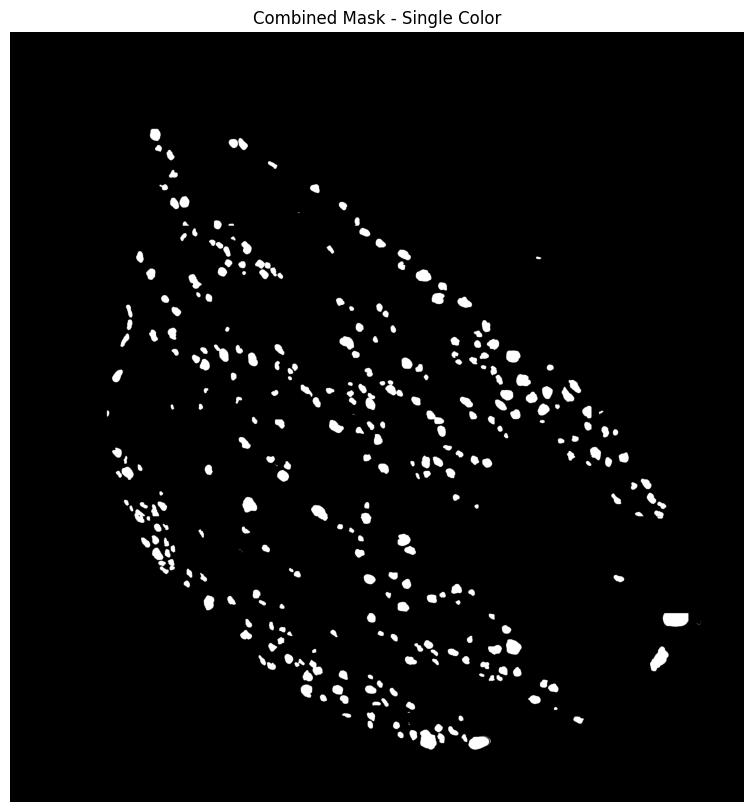

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Create a binary mask (optional: if combined_mask contains labels like 1,2,3...)
binary_mask = (combined_mask > 0).astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.imshow(binary_mask, cmap='gray')  # all non-zero values will be gray
plt.title('Combined Mask - Single Color')
plt.axis('off')

# Save the figure as PNG
plt.savefig('combined_mask_grey_testing_model.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


### validate original and stiched mask size

In [ ]:
from PIL import Image
import numpy as np

image = Image.open("jayden_img.ome.png").convert("RGB")
image_np = np.array(image)
mask = np.load("combined_full_mask_testing_model.npy")

## overlay mask and the oroginal image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.segmentation import find_boundaries

# Define colors
overlay_color = np.array([238, 144, 144])  # Light green
boundary_color = np.array([100, 100, 255])     # Navy blue
alpha = 0.5  # Transparency for overlay

# Ensure mask is binary
mask = (mask > 0).astype(np.uint8)

# Create a copy for overlay
overlay = image_np.copy()

# Apply overlay color where mask is 1
overlay[mask == 1] = ((1 - alpha) * image_np[mask == 1] + alpha * overlay_color).astype(np.uint8)

# --- Add navy blue boundaries ---
from skimage.segmentation import find_boundaries

# Find boundaries in the mask
boundaries = find_boundaries(mask, mode='outer')

# Draw boundary color
overlay[boundaries] = boundary_color

# Show plot
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.axis("off")
plt.title("Image with Mask Overlay and Navy Blue Boundary")
plt.show()

# Save the image
output = Image.fromarray(overlay)
output.save("0_image_with_mask_overlay_with_white_boundary_model.png")